<a href="https://colab.research.google.com/github/Rabaanie/Kaggle-Python/blob/main/MIS_515_Kaggle_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === Kaggle Project 02: Classification Logistic Regression ===
# Team Data Defenders v2.0 (Rabaanie Jon, Kyle Shafer, Jhodail Santos)

# Gender Classification Dataset:
# https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

In [ ]:
# Google Collab Autosaving Function
%autosave 60

Autosaving every 60 seconds


**Importing Python Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
#long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
#forehead_width_cm - This column is in CM's. This is the width of the forehead.
#forehead_height_cm - This is the height of the forehead and it's in Cm's.
#nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
#nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
#lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
#distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".
#gender - This is either "Male" or "Female".

**Creating Dataframe**

In [ ]:
# Creating the DataFrame
df=pd.read_csv("gender_classification_v7.csv")

In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
# Returns size of DataFrame (i.e., Column & Row)
df.shape

(5001, 8)

**Building the Logistic Regression Model**

In [ ]:
# Splits data into features (X) and target (y)
X = df.drop('gender', axis=1)
y = df['gender']

In [ ]:
# Split data into train and test sets with "random_state" of 71
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.02, random_state=71)#use 20%

In [ ]:
# Logistic Regresion Model with "liblinear" as solver
logisticRegr = LogisticRegression(solver='liblinear', max_iter=1000)
logisticRegr.fit(X_train, y_train)

# Y-Predictor based on the test set
y_pred = logisticRegr.predict(X_test)

**Evaluation Metrics**

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Extracting Sensitivity, Specificity, and F1 Score from the classification report
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)

Precision: [0.94       0.88235294]
Recall: [0.88679245 0.9375    ]
F1 Score: [0.91262136 0.90909091]
Support: [53 48]


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

      Female       0.94      0.89      0.91        53
        Male       0.88      0.94      0.91        48

    accuracy                           0.91       101
   macro avg       0.91      0.91      0.91       101
weighted avg       0.91      0.91      0.91       101



**Confusion Matrix**

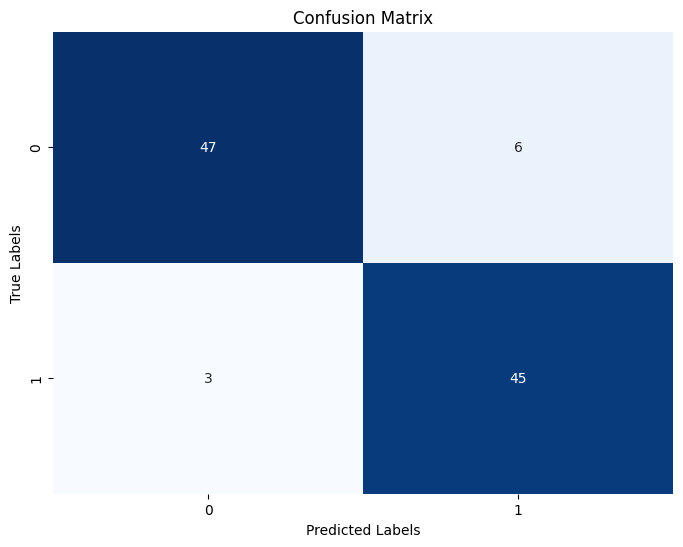

In [ ]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
#True Positives (TP): The number of instances where the model correctly predicted the positive class(1) 45
#True Negatives (TN): The number of instances where the model correctly predicted the negative class (0) 47
#False Positives (FP): The number of instances where the model predicted the positive class incorrectly 6 for the (Actual 0, Predicted 1) entry.
#False Negatives (FN): The number of instances where the model predicted the negative class incorrectly 3 for the (Actual 1, Predicted 0) entry.